In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import torch
import torch.nn as nn

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


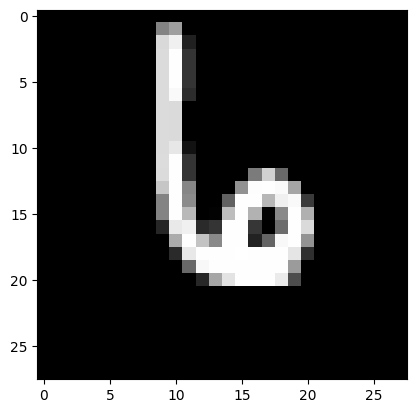

In [4]:
pixels = np.array(train.iloc[123])
pixels = pixels[1:]
pixels = pixels.reshape((28, 28))

plt.imshow(pixels, cmap='grey')

In [5]:
X_train = np.array(train.drop('label', axis=1)) / 255
y_train = np.array(train['label'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2026)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(33600, 784)
(33600,)
(8400, 784)


In [6]:
x0 = np.random.normal(size=(784, 10)) / np.sqrt(784)

In [7]:
neourons = torch.tensor(x0, requires_grad=True)

In [8]:
X = torch.tensor(X_train)
y = torch.tensor(y_train)

optimizer = torch.optim.SGD(params=[neourons], lr = 1)
loss_history = []
epochs = 200

for i in range(epochs):
    predictions = X @ neourons
    loss = torch.nn.functional.cross_entropy(predictions, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())


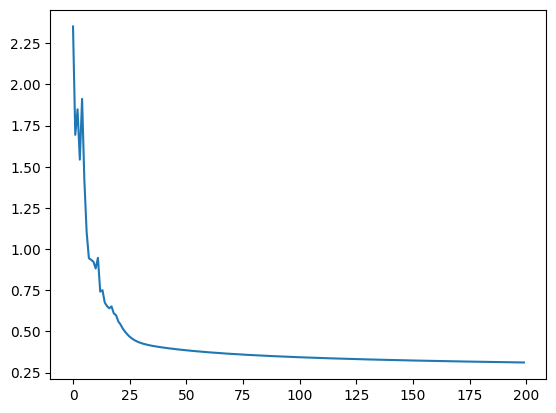

In [9]:
plt.plot(loss_history)

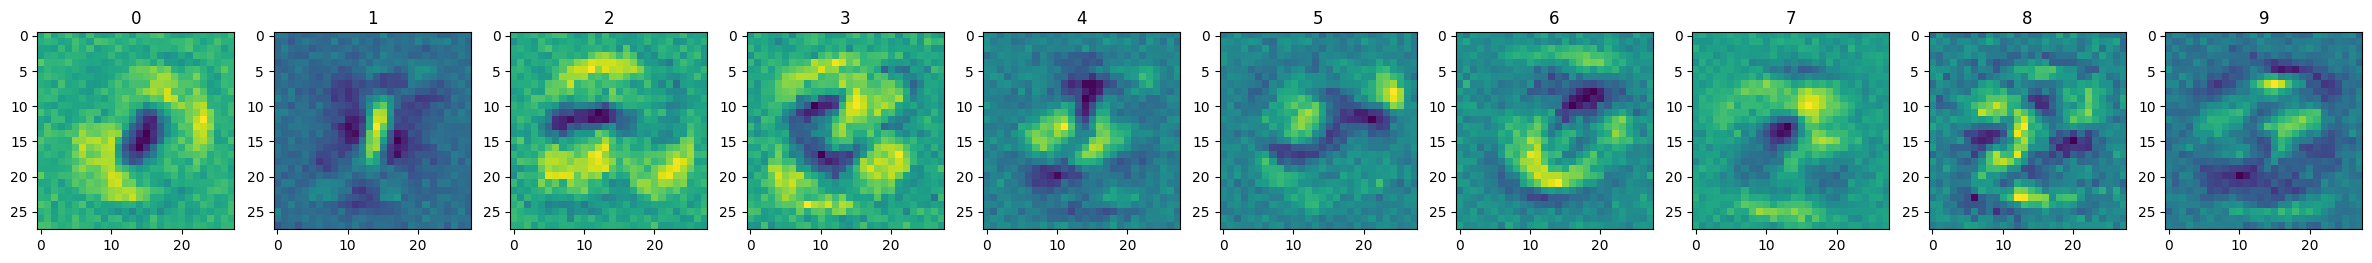

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(30,30))

for i in range(10):
    axes[i].set_title(i)
    neuron_img = neourons[:,i].data.numpy().reshape(28, 28)
    axes[i].imshow(neuron_img)

In [11]:
def sigmoid(x):
    ex = np.exp(x)
    return ex / 1+ ex

digit_probabilities = sigmoid((X @ neourons).data.numpy())
print(digit_probabilities.shape)

(33600, 10)


In [12]:
from sklearn.metrics import f1_score

predictions = np.argmax(digit_probabilities, axis=1)
print(predictions.shape)
print("Train F1: ", f1_score(y_train, predictions, average='macro'))

(33600,)
Train F1:  0.9115724055750292


In [13]:
import torch.nn.functional as F
class MyFirstNN(nn.Module):
    def __init__(self, n_hidden_neurons=200):
        super().__init__()

        # init_1 = np.random.normal(size=(784, n_hidden_neurons)) / np.sqrt(784)
        # self.neurons_layer1 = torch.tensor(init_1, requires_grad=True)
        # self.neurons_layer1 = nn.Parameter(self.neurons_layer1)
        self.neurons_layer1 = nn.Linear(784, n_hidden_neurons)
        # init_2 = np.random.normal(size=(n_hidden_neurons, 10)) / np.sqrt(n_hidden_neurons)
        # self.neurons_layer2 = torch.tensor(init_2, requires_grad=True)
        # self.neurons_layer2 = nn.Parameter(self.neurons_layer2)
        self.neurons_layer2 = nn.Linear(n_hidden_neurons, 10)

    def forward(self, x):
        # h = x @ self.neurons_layer1
        h =  self.neurons_layer1(x)
        # h = torch.relu(h)
        h = F.relu(h)
        # out = h @ self.neurons_layer2(h)
        out = self.neurons_layer2(h)
        return out

In [14]:
model = MyFirstNN()

optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001)

In [15]:
from tqdm import tqdm

N_EPOCHS = 50
X_tr = torch.tensor(X_train[1000:], dtype=torch.float32)
y_tr = torch.tensor(y_train[1000:], dtype=torch.long)
X_dev = torch.tensor(X_train[:1000], dtype=torch.float32)
y_dev = torch.tensor(y_train[:1000], dtype=torch.long)

train_loss_history = []
dev_loss_history = []

for i in tqdm(range(N_EPOCHS)):
    predictions = model(X_tr)
    loss = F.cross_entropy(predictions, y_tr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_history.append(loss.item())

    if i % 10 == 0:
        predictions = model(X_dev)
        loss = F.cross_entropy(predictions, y_dev)
        dev_loss_history.append(loss.item())

100%|██████████| 50/50 [00:04<00:00, 11.34it/s]


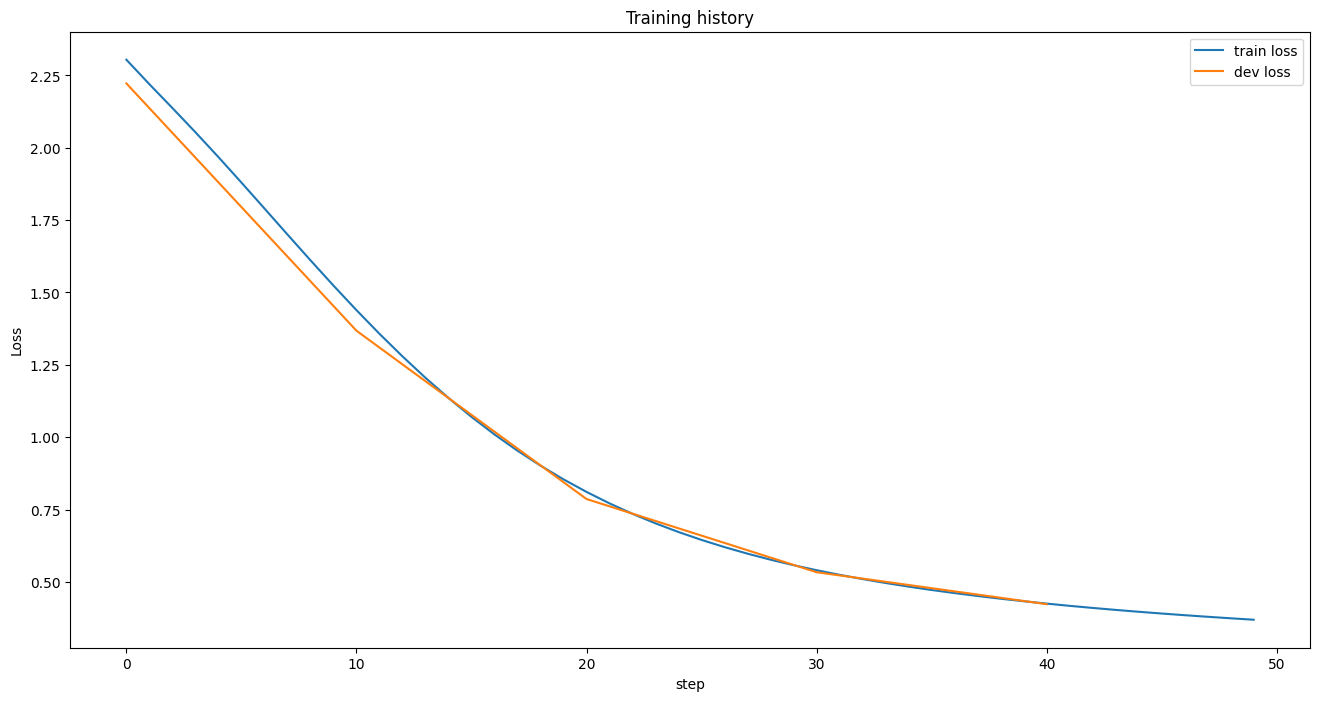

In [16]:
plt.figure(figsize=(16, 8))
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('step')
plt.plot(range(N_EPOCHS), train_loss_history, label='train loss')
plt.plot(range(N_EPOCHS)[::10], dev_loss_history, label='dev loss')
plt.legend()

In [18]:
digit_probabilities = model(X_dev).detach().numpy()

from sklearn.metrics import classification_report

predictions = np.argmax(digit_probabilities, axis=1)
print(classification_report(y_dev.detach().cpu().numpy(), predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        94
           1       0.91      0.97      0.94       110
           2       0.93      0.85      0.89       116
           3       0.89      0.89      0.89       107
           4       0.90      0.87      0.88       112
           5       0.91      0.82      0.87        90
           6       0.87      0.92      0.89        77
           7       0.94      0.89      0.92       113
           8       0.85      0.89      0.87        99
           9       0.78      0.84      0.81        82

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [28]:
class MySecondNN(nn.Module):
    def __init__(self, n_hidden_neurons=200):
        super().__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, n_hidden_neurons)
        self.linear3 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.linear4 = nn.Linear(n_hidden_neurons, 10)
        self.ReLU = nn.ReLU(inplace=True)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [29]:
model = MySecondNN().cuda()

optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.001)

In [30]:
N_EPOCHS = 150
X_tr = torch.tensor(X_train[1000:], dtype=torch.float32).cuda()
y_tr = torch.tensor(y_train[1000:], dtype=torch.long).cuda()
X_dev = torch.tensor(X_train[:1000], dtype=torch.float32).cuda()
y_dev = torch.tensor(y_train[:1000], dtype=torch.long).cuda()

train_loss_history = []
dev_loss_history = []
ce = nn.CrossEntropyLoss()

for i in tqdm(range(N_EPOCHS)):
    predictions = model(X_tr)
    loss = ce(predictions, y_tr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_history.append(loss.item())

    if i % 10 == 0:
        predictions = model(X_dev)
        loss = ce(predictions, y_dev)
        dev_loss_history.append(loss.item())

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [00:01<00:00, 130.42it/s]


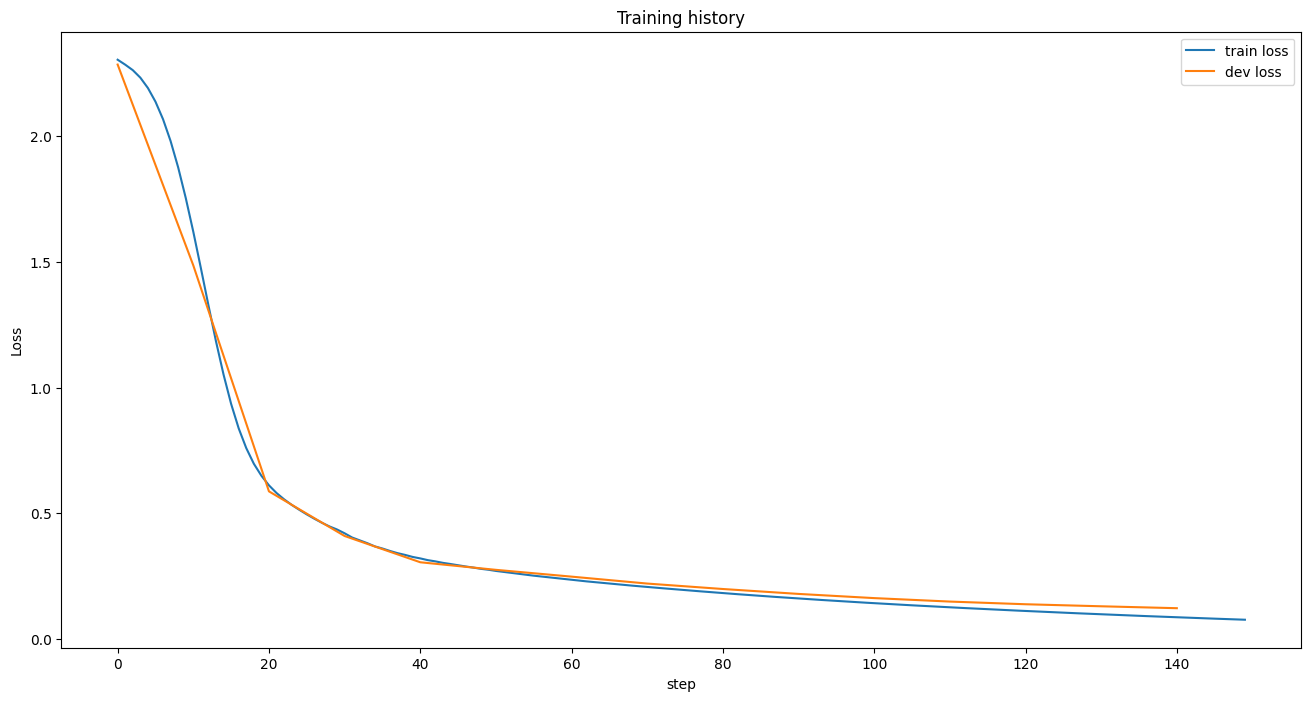

In [31]:
plt.figure(figsize=(16, 8))
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('step')
plt.plot(range(N_EPOCHS), train_loss_history, label='train loss')
plt.plot(range(N_EPOCHS)[::10], dev_loss_history, label='dev loss')
plt.legend()

In [36]:
digit_probabilities = model(X_dev).detach().cpu().numpy()

from sklearn.metrics import classification_report

predictions = np.argmax(digit_probabilities, axis=1)
print(classification_report(y_dev.detach().cpu().numpy(), predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.98      0.98      0.98       110
           2       0.97      0.96      0.97       116
           3       0.94      0.93      0.94       107
           4       0.98      0.96      0.97       112
           5       0.97      0.94      0.96        90
           6       0.96      1.00      0.98        77
           7       0.95      0.93      0.94       113
           8       0.97      0.97      0.97        99
           9       0.88      0.95      0.91        82

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# модули библиотеки PyTorch
import torch
from torchvision import datasets, transforms
# метрика качества 

In [2]:
transform_train = transforms.Compose([
    transforms.ToTensor()
])

transform_val = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)

100%|██████████| 170M/170M [00:57<00:00, 2.98MB/s] 


In [4]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, pin_memory=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)

In [5]:
train_loader

In [6]:
dataiter = iter(train_loader)

images, labels = next(dataiter)

In [7]:
images.shape

torch.Size([16, 3, 32, 32])

In [8]:
labels.shape

torch.Size([16])

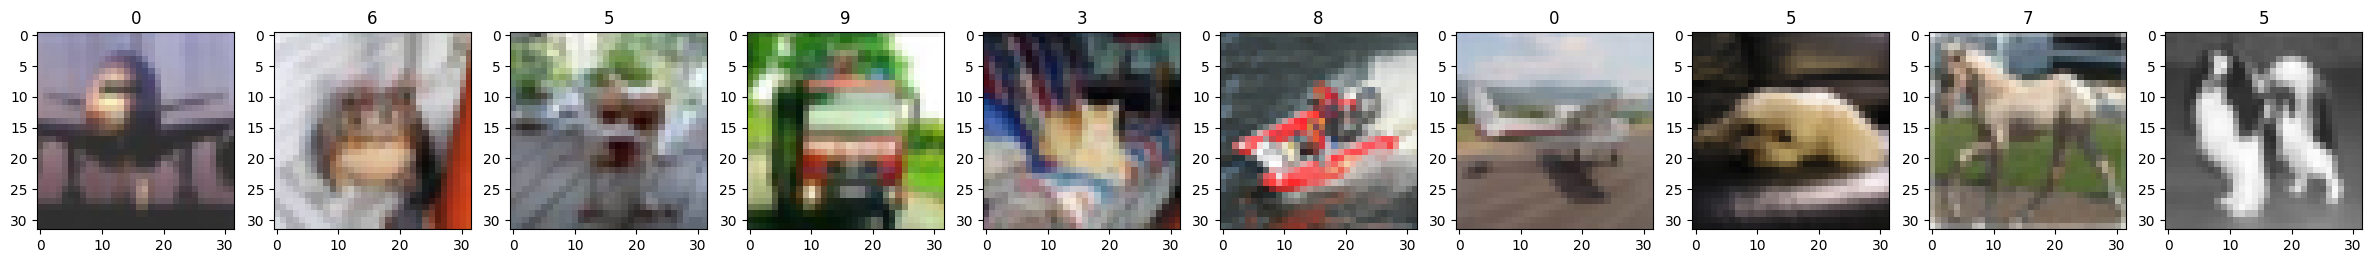

In [9]:
def show_images(imgs, labels):
    f, axes = plt.subplots(1, 10, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(labels[i].numpy())
    plt.show()

show_images(images, labels)

In [10]:
num_to_name = {
    0: "Самолет",
    1: "Автомобиль",
    2: "Птица",
    3: "Кошка",
    4: "Олень",
    5: "Собака",
    6: "Лягушка",
    7: "Лошадь",
    8: "Корабль",
    9: "Грузовик"
}

In [11]:
import torch.nn as nn 
import torch.nn.functional as F

In [12]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [16]:
def train(net, n_epoch=5):
    loss_fn = torch.nn.CrossEntropyLoss()

    learning_rate = 1e-3
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

    best_accuracy = 0

    for epoch in tqdm(range(n_epoch)):

        running_loss = 0.0
        train_dataiter = iter(train_loader)
        for i, batch in enumerate(tqdm(train_dataiter)):
            X_batch, y_batch = batch
            optimizer.zero_grad()
            y_pred = net(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i%500 == 499:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/500))
                running_loss = 0.0

        with torch.no_grad():
            accuracy = []
            for batch in test_loader:
                x, y = batch
                y_pred = net(x)
                accuracy.append(accuracy_score(y.detach().numpy(), np.argmax(y_pred.detach().numpy(), axis=1)))
            accuracy = np.mean(np.array(accuracy))

            if accuracy > best_accuracy:
                print('Новая лучшая точность:', accuracy)
                torch.save(net.state_dict(), './best_model.pt')
                best_accuracy = accuracy
    print('Обучение завершено!')

    return net


In [17]:
net = SimpleNet()

net = train(net)

  0%|          | 0/5 [00:00<?, ?it/s]

[1,   500] loss: 2.040


[1,  1000] loss: 1.904


[1,  1500] loss: 1.834


[1,  2000] loss: 1.822


[1,  2500] loss: 1.794


[1,  3000] loss: 1.762


 20%|██        | 1/5 [00:17<01:09, 17.34s/it]

Новая лучшая точность: 0.3781


[2,   500] loss: 1.747


 18%|█▊        | 562/3125 [00:01<00:08, 308.09it/s]

[2,  1000] loss: 1.735


[2,  1500] loss: 1.724


[2,  2000] loss: 1.713


[2,  2500] loss: 1.698


[2,  3000] loss: 1.670


 40%|████      | 2/5 [00:35<00:53, 17.76s/it]

Новая лучшая точность: 0.3967


[3,   500] loss: 1.670


[3,  1000] loss: 1.678



 50%|█████     | 1570/3125 [00:04<00:04, 337.01it/s]

[3,  1500] loss: 1.672


[3,  2000] loss: 1.663


[3,  2500] loss: 1.645


[3,  3000] loss: 1.668


 60%|██████    | 3/5 [00:54<00:36, 18.18s/it]

[4,   500] loss: 1.645


[4,  1000] loss: 1.634


[4,  1500] loss: 1.652


[4,  2000] loss: 1.615


[4,  2500] loss: 1.624


[4,  3000] loss: 1.635


 80%|████████  | 4/5 [01:12<00:18, 18.20s/it]

Новая лучшая точность: 0.4167


[5,   500] loss: 1.585


[5,  1000] loss: 1.603


[5,  1500] loss: 1.626


[5,  2000] loss: 1.600


[5,  2500] loss: 1.596


[5,  3000] loss: 1.628


100%|██████████| 5/5 [01:30<00:00, 18.05s/it]

Новая лучшая точность: 0.4203
Обучение завершено!


In [18]:
with torch.no_grad():
    accuracy = []
    for batch in test_loader:
        x, y = batch
        y_pred = net(x)
        accuracy.append(accuracy_score(y.detach().numpy(), np.argmax(y_pred.detach().numpy(), axis=1)))
    accuracy = np.mean(np.array(accuracy))
print('accuracy: ', accuracy)

accuracy:  0.4203


In [19]:
device = torch.device('cuda')

In [20]:
torch.cuda.is_available()

True

In [21]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 5060 Ti'

In [22]:
def train(net, n_epoch=5):
    loss_fn = torch.nn.CrossEntropyLoss()

    learning_rate = 1e-3
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

    best_accuracy = 0

    for epoch in tqdm(range(n_epoch)):

        running_loss = 0.0
        train_dataiter = iter(train_loader)
        for i, batch in enumerate(tqdm(train_dataiter)):
            X_batch, y_batch = batch
            ###############
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            ###############
            optimizer.zero_grad()
            y_pred = net(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i%500 == 499:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/500))
                running_loss = 0.0

        with torch.no_grad():
            accuracy = []
            for batch in test_loader:
                x, y = batch
                ###############
                x = x.to(device)
                y = y.to(device)
                ###############
                y_pred = net(x)
                accuracy.append(accuracy_score(y.detach().cpu().numpy(), np.argmax(y_pred.detach().cpu().numpy(), axis=1)))##############
            accuracy = np.mean(np.array(accuracy))

            if accuracy > best_accuracy:
                print('Новая лучшая точность:', accuracy)
                torch.save(net.state_dict(), './best_model.pt')
                best_accuracy = accuracy
    print('Обучение завершено!')

    return net


In [23]:
model = nn.Sequential(
    Flatten(),
    nn.Linear(32*32*3, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
).to(device)

In [24]:
model = train(model, n_epoch=30)

  0%|          | 0/30 [00:00<?, ?it/s]

[1,   500] loss: 2.159


[1,  1000] loss: 2.096


[1,  1500] loss: 2.067


[1,  2000] loss: 2.049


[1,  2500] loss: 2.043


[1,  3000] loss: 2.028


  3%|▎         | 1/30 [00:18<08:49, 18.27s/it]

Новая лучшая точность: 0.2


[2,   500] loss: 1.986


[2,  1000] loss: 1.957


[2,  1500] loss: 1.910


[2,  2000] loss: 1.903


[2,  2500] loss: 1.866


[2,  3000] loss: 1.859


  7%|▋         | 2/30 [00:35<08:21, 17.92s/it]

Новая лучшая точность: 0.3077


[3,   500] loss: 1.833


[3,  1000] loss: 1.827


[3,  1500] loss: 1.809


[3,  2000] loss: 1.813


[3,  2500] loss: 1.800


[3,  3000] loss: 1.796


 10%|█         | 3/30 [00:54<08:12, 18.24s/it]

Новая лучшая точность: 0.349


[4,   500] loss: 1.784


[4,  1000] loss: 1.762


[4,  1500] loss: 1.793


[4,  2000] loss: 1.770


[4,  2500] loss: 1.770


[4,  3000] loss: 1.773


 13%|█▎        | 4/30 [01:13<07:58, 18.39s/it]

Новая лучшая точность: 0.3506


[5,   500] loss: 1.749


[5,  1000] loss: 1.752


[5,  1500] loss: 1.765


[5,  2000] loss: 1.737


[5,  2500] loss: 1.736


[5,  3000] loss: 1.733


 17%|█▋        | 5/30 [01:32<07:48, 18.72s/it]

Новая лучшая точность: 0.3658


[6,   500] loss: 1.716


[6,  1000] loss: 1.722


[6,  1500] loss: 1.710


[6,  2000] loss: 1.720


[6,  2500] loss: 1.726


[6,  3000] loss: 1.704


 20%|██        | 6/30 [01:51<07:32, 18.83s/it]

Новая лучшая точность: 0.3811


[7,   500] loss: 1.716


[7,  1000] loss: 1.690


[7,  1500] loss: 1.683


[7,  2000] loss: 1.695


[7,  2500] loss: 1.695


[7,  3000] loss: 1.693


 23%|██▎       | 7/30 [02:09<07:04, 18.47s/it]

Новая лучшая точность: 0.3849


[8,   500] loss: 1.665


[8,  1000] loss: 1.689


[8,  1500] loss: 1.672


[8,  2000] loss: 1.693


[8,  2500] loss: 1.688


[8,  3000] loss: 1.669


 27%|██▋       | 8/30 [02:27<06:43, 18.33s/it]

Новая лучшая точность: 0.392


[9,   500] loss: 1.665


[9,  1000] loss: 1.662


[9,  1500] loss: 1.669


[9,  2000] loss: 1.668


[9,  2500] loss: 1.658


[9,  3000] loss: 1.662


 30%|███       | 9/30 [02:44<06:18, 18.01s/it]

Новая лучшая точность: 0.3999


[10,   500] loss: 1.620


[10,  1000] loss: 1.671


[10,  1500] loss: 1.658


[10,  2000] loss: 1.646


[10,  2500] loss: 1.644


[10,  3000] loss: 1.636


 33%|███▎      | 10/30 [03:02<05:59, 18.00s/it]

Новая лучшая точность: 0.4028


[11,   500] loss: 1.637


[11,  1000] loss: 1.638


[11,  1500] loss: 1.629


[11,  2000] loss: 1.650


[11,  2500] loss: 1.641


[11,  3000] loss: 1.638


 37%|███▋      | 11/30 [03:20<05:39, 17.88s/it]

Новая лучшая точность: 0.4082


[12,   500] loss: 1.609


[12,  1000] loss: 1.629


[12,  1500] loss: 1.623


[12,  2000] loss: 1.615


[12,  2500] loss: 1.619


[12,  3000] loss: 1.643


 40%|████      | 12/30 [03:37<05:20, 17.81s/it]

Новая лучшая точность: 0.4134


[13,   500] loss: 1.612


[13,  1000] loss: 1.626


[13,  1500] loss: 1.610


[13,  2000] loss: 1.627


[13,  2500] loss: 1.611


[13,  3000] loss: 1.603


 43%|████▎     | 13/30 [03:55<05:00, 17.69s/it]

Новая лучшая точность: 0.4196


[14,   500] loss: 1.601


[14,  1000] loss: 1.617


[14,  1500] loss: 1.598


[14,  2000] loss: 1.587


[14,  2500] loss: 1.609


[14,  3000] loss: 1.625


 47%|████▋     | 14/30 [04:12<04:41, 17.59s/it]

[15,   500] loss: 1.595


[15,  1000] loss: 1.612


[15,  1500] loss: 1.595


[15,  2000] loss: 1.582


[15,  2500] loss: 1.610


[15,  3000] loss: 1.597


 50%|█████     | 15/30 [04:29<04:22, 17.48s/it]

[16,   500] loss: 1.571


[16,  1000] loss: 1.603


[16,  1500] loss: 1.601


[16,  2000] loss: 1.566


[16,  2500] loss: 1.565


[16,  3000] loss: 1.605


 53%|█████▎    | 16/30 [04:46<04:02, 17.34s/it]

[17,   500] loss: 1.571


[17,  1000] loss: 1.570


[17,  1500] loss: 1.584


[17,  2000] loss: 1.585


[17,  2500] loss: 1.592


[17,  3000] loss: 1.593


 57%|█████▋    | 17/30 [05:03<03:44, 17.23s/it]

[18,   500] loss: 1.561


[18,  1000] loss: 1.569


[18,  1500] loss: 1.581


[18,  2000] loss: 1.561


[18,  2500] loss: 1.579


[18,  3000] loss: 1.595


 60%|██████    | 18/30 [05:20<03:25, 17.12s/it]

Новая лучшая точность: 0.4245


[19,   500] loss: 1.544


[19,  1000] loss: 1.554


[19,  1500] loss: 1.589


[19,  2000] loss: 1.573


[19,  2500] loss: 1.579


[19,  3000] loss: 1.565


 63%|██████▎   | 19/30 [05:37<03:08, 17.09s/it]

[20,   500] loss: 1.554


[20,  1000] loss: 1.547


[20,  1500] loss: 1.556


[20,  2000] loss: 1.572


[20,  2500] loss: 1.567


[20,  3000] loss: 1.552


 67%|██████▋   | 20/30 [05:54<02:50, 17.09s/it]

[21,   500] loss: 1.536


[21,  1000] loss: 1.543


[21,  1500] loss: 1.556


[21,  2000] loss: 1.567


[21,  2500] loss: 1.549


[21,  3000] loss: 1.559


 70%|███████   | 21/30 [06:12<02:34, 17.16s/it]

Новая лучшая точность: 0.4289


[22,   500] loss: 1.548


[22,  1000] loss: 1.527


[22,  1500] loss: 1.544


[22,  2000] loss: 1.543


[22,  2500] loss: 1.558


[22,  3000] loss: 1.540


 73%|███████▎  | 22/30 [06:29<02:18, 17.26s/it]

[23,   500] loss: 1.541


[23,  1000] loss: 1.534


[23,  1500] loss: 1.549


[23,  2000] loss: 1.555


 66%|██████▋   | 2074/3125 [00:05<00:02, 359.42it/s]

[23,  2500] loss: 1.529


[23,  3000] loss: 1.550


 77%|███████▋  | 23/30 [06:48<02:03, 17.62s/it]

[24,   500] loss: 1.519


[24,  1000] loss: 1.522


[24,  1500] loss: 1.540


[24,  2000] loss: 1.544


[24,  2500] loss: 1.547


[24,  3000] loss: 1.562


 80%|████████  | 24/30 [07:07<01:48, 18.08s/it]

[25,   500] loss: 1.532


[25,  1000] loss: 1.528


[25,  1500] loss: 1.511


[25,  2000] loss: 1.537


[25,  2500] loss: 1.550


[25,  3000] loss: 1.537


 83%|████████▎ | 25/30 [07:26<01:32, 18.57s/it]

Новая лучшая точность: 0.4296


[26,   500] loss: 1.488


[26,  1000] loss: 1.532


[26,  1500] loss: 1.524


[26,  2000] loss: 1.545


[26,  2500] loss: 1.532


[26,  3000] loss: 1.535


 87%|████████▋ | 26/30 [07:46<01:15, 18.79s/it]

Новая лучшая точность: 0.4336


[27,   500] loss: 1.511


[27,  1000] loss: 1.500


[27,  1500] loss: 1.521



 66%|██████▌   | 2065/3125 [00:06<00:03, 326.13it/s]

[27,  2000] loss: 1.539


[27,  2500] loss: 1.530


[27,  3000] loss: 1.507


 90%|█████████ | 27/30 [08:05<00:56, 18.87s/it]

[28,   500] loss: 1.520


[28,  1000] loss: 1.541


[28,  1500] loss: 1.519


[28,  2000] loss: 1.527


[28,  2500] loss: 1.500


[28,  3000] loss: 1.520


 93%|█████████▎| 28/30 [08:24<00:37, 18.91s/it]

[29,   500] loss: 1.523


[29,  1000] loss: 1.523


[29,  1500] loss: 1.499


[29,  2000] loss: 1.495


[29,  2500] loss: 1.516


[29,  3000] loss: 1.520


 97%|█████████▋| 29/30 [08:42<00:18, 18.78s/it]

[30,   500] loss: 1.506


[30,  1000] loss: 1.495


[30,  1500] loss: 1.515


[30,  2000] loss: 1.526


[30,  2500] loss: 1.511


[30,  3000] loss: 1.524


100%|██████████| 30/30 [09:01<00:00, 18.06s/it]

Обучение завершено!


In [25]:
with torch.no_grad():
    accuracy = []
    for batch in test_loader:
        x, y = batch
        y_pred = model(x.to(device))
        accuracy.append(accuracy_score(y.numpy(), np.argmax(y_pred.detach().cpu().numpy(), axis=1)))
    accuracy = np.mean(np.array(accuracy))

print('Accuracy: ', accuracy)


Accuracy:  0.4331
